In [1]:
#usual imports
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})#suppresses warning about having too many figures (charts) open
#copied from https://stackoverflow.com/questions/27476642/matplotlib-get-rid-of-max-open-warning-output

The Schrodinger equation separated into two first-order equations:

1,2 [1].
$$
\frac{d \psi}{dx } = \phi, \\
\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x),
$$

In [2]:
#key constants
m = 9.109383702e-31#electron mass in kg
h_bar = 1.054571817e-34#h bar in Js
e = 1.602176634e-19#electron charge in C

#key values for this assignment [1]
a = 5e-11#half width of the potential well
N = 1000#number of points for Runge Kutta
h = (2*a)/N#step size between -a and +a

x_arr = np.arange(-a, a, h)#array of 1000 points of x between -a and a

def V(x):
    '''return the potential at position x 
    Inputs: x - value or array of values
    Outputs: V - value or array of values
    '''
    return 0.0#initial setting- for infinite well

def f(r,x,E):#named f so it works with existing Runge Kutta code
    '''return the differential of psi with respect to x
    and differential of phi with respect to x
    Inputs: r - array of [psi, phi]
            x - value of position
            E - value of Energy
    Outputs:differential of psi with respect to x
            differential of phi with respect to x'''
    difx_psi = r[1]#(1)
    difx_phi = ((2*m)/(h_bar**2)) * (V(x) - E) * r[0]#(2)
    return np.array([difx_psi, difx_phi])#array output adapted from PHAS0029 Session 8

# copied and adapted from PHAS0029 Session 6
def RungeKutta2d(r,x_arr, E):#changed variable names and added E
    '''Fourth-order Runge-Kutta rewritten for two simultaneous equations
    Inputs: r: 2-component array , first component is psi, second is phi
               x_arr is a value or array of values 
               E is value
    Outputs: [xpoints, ypoints]: solutions for x(t) and y(t), numpy arrays one longer than x_arr'''
    psi_arr = [] # initialise empty arrays
    phi_arr = []
    for x in x_arr: # loops over all tpoints up to (tend-h)
        psi_arr.append(r[0])
        phi_arr.append(r[1])
        # The following is the same as the 1d version, with x->r
        k1 = h*f(r,x,E) 
        k2 = h*f(r+0.5*k1, x+0.5*h, E)
        k3 = h*f(r+0.5*k2, x+0.5*h, E)
        k4 = h*f(r+k3, x+h, E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    psi_arr.append(r[0])
    phi_arr.append(r[1])
    return np.array([psi_arr, phi_arr]) # convert output to numpy array with 2 rows and N+1 columns

### Choice of $\phi$ ###
It was decided to set $\phi = \pi$. If it is set to 0, then $\psi = 0$ at all points, which satisfies the boundary condition but is not a wavefunction with different values for x. $\pi$ was chosen as $\phi$ might be an angle. NB later work made it seem unlikely that $\phi$ was an angle, more likely to be a normalization factor and choice of whether $\phi$ is positive or negative has an impact on the symmetry of $\psi$.

In [3]:
E1 = 5e-18#ground state = 6E-18J so chose values either side
E2 = 7e-18

tolerance = e/1000000000# set the tolerance for convergence. Set lower than Hint4 [1] to get even closer

def secant_method(x_arr, E1, E2, N): 
    last_psi_1 = RungeKutta2d(np.array([0, 1]),x_arr, E1)[0,N]
    last_psi_2 = RungeKutta2d(np.array([0, 1]),x_arr, E2)[0,N]

    while abs(E2-E1) > tolerance: # ...is diff between the two energies less than the tolerance yet? 
        E3 = E2 - last_psi_2*(E2-E1)/(last_psi_2-last_psi_1)  
        # update initial energies for the next iteration
        E1 = E2 
        E2 = E3 
        # and recalculate last psi
        last_psi_1 = RungeKutta2d(np.array([0, 1]),x_arr, E1)[0,N]
        last_psi_2 = RungeKutta2d(np.array([0, 1]),x_arr, E2)[0,N]

    Calc_E = (E1+E2)/2#take average of E1, E2 as best estimate of ground state energy
    return Calc_E

Calc_E = secant_method(x_arr, E1, E2, N)

print("Calculated from Runge Kutta 4th order with Secant Method")
print("Ground State Energy:", Calc_E/e, "eV")
E_1 = np.pi**2*h_bar**2/(2*m*(2*a)**2)#equation 5
print("\nCalculated from theory")
print("Ground State Energy:", E_1/e, "eV")

Calculated from Runge Kutta 4th order with Secant Method
Ground State Energy: 37.60301621353999 eV

Calculated from theory
Ground State Energy: 37.6030162135296 eV


### Conclusion ###
The values calculated agree with theory to 12 significant figures. Therefore the analytic method works well and can be applied to situations where this is no theoretical solution. <p> The next stages of the Final Assessment could now be attempted.

<IPython.core.display.Javascript object>


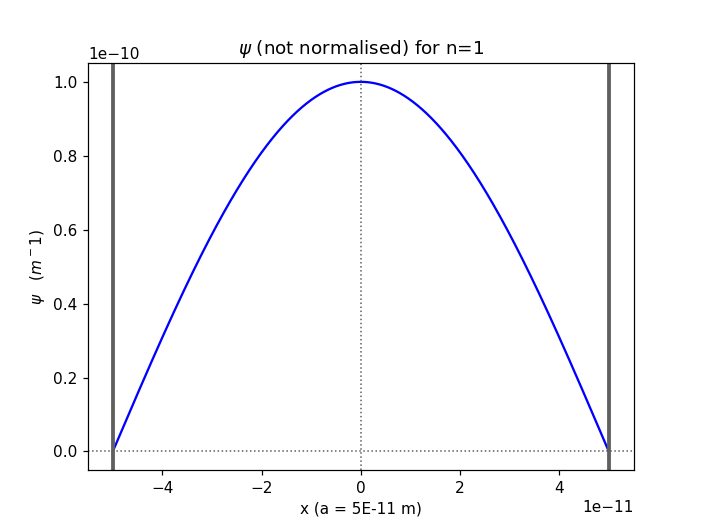

In [4]:
psi_1 = RungeKutta2d(np.array([0, np.pi]),x_arr, Calc_E)[0]#groud state energy wavefunctions with calculated E
x_plot = np.arange(-a, a+h, h)# adapted from Session 8.
#array with same properties as x_arr but includes end point
plt.figure()
plt.plot(x_plot, psi_1, "b")
plt.axvline(x=-a, c="#5f5f5f", ls="-", lw=2.5)#from hint 5
plt.axvline(x=a, c="#5f5f5f", ls="-", lw=2.5)
plt.axvline(x=0, c="#5f5f5f", ls="dotted", lw=1)#show as dotted thinner line as not a boundary
plt.axhline(y=0, c="#5f5f5f", ls="dotted", lw=1)
plt.xlabel("x (a = 5E-11 m)")
plt.ylabel("$\psi$   $(m^-1)$")
plt.title("$\psi$ (not normalised) for n=1");

### Discussion ###
This is the expected shape of the n=1 wavefunction. It ressembles the *Calculated trajectory for 10 second flight* from Session 8. More relevant in terms of physics is its ressemblance to the first mode in *Displacement by bead number for first three normal modes* from Session 9.

The next step in the assigment was to normalize the wavefunction, applying the trapezoidal rule (3)

3. [1]
$$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{n-1}f(x + kh) \right]
$$

The integral limits were set from -a to +a as wavefunction does not exist outside these boundaries. The same N=1000 and h could be used as previously. Therefore numpy array could be used for the wavefunction. It was summed and multiplied by h to give value of integral. NB $\psi(a)$ and $\psi(-a)$ are both equal to zero, as at boundary, so we didn't need to include in calcualtion.

In [5]:
I= h * np.sum(psi_1**2)#calculation of integral using (3)
psi_1 = psi_1 / I**0.5#normalizing wavefunction by dividing by square root of I
I= h * np.sum(psi_1**2)
print("Integral of normalized wavefunction should equal 1, check:", I)#checking that integral of normalized wavefunction is 1

Integral of normalized wavefunction should equal 1, check: 1.0


4a, 4b [1].
$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
    n \ \mathrm{odd}
    $$
    $$
    \psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even}.
$$

In [6]:
psi_1_theory = (1/a**0.5)*np.cos(np.pi* x_plot/ (2*a))#using (4a) with n =1, i.e. odd
#need to pass in x_plot not x_arr to get same array length as psi_1, i.e. 1001
#checking array lengths
print(len(psi_1_theory))
print(len(psi_1))

1001
1001


<IPython.core.display.Javascript object>


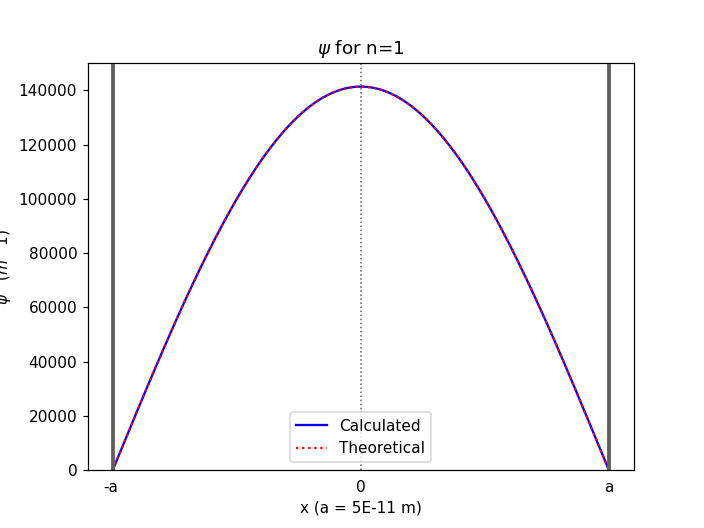

In [7]:
#copied and adapted from previous code
plt.figure()
plt.text(-a-0.2e-11,-8000,'-a')
plt.plot(x_plot, psi_1, "b", label = "Calculated")
plt.plot(x_plot, psi_1_theory, "r", ls="dotted", label = "Theoretical")
plt.axvline(x=-a, c="#5f5f5f", ls="-", lw=2.5)#from hint 5 [1]
plt.axvline(x=a, c="#5f5f5f", ls="-", lw=2.5)
plt.axvline(x=0, c="#5f5f5f", ls="dotted", lw=1)#show as dotted thinner line as not a boundary
plt.text(-0.1e-11, -8000, "0")#adapted from https://stackoverflow.com/questions/13413112/creating-labels-where-line-appears-in-matplotlib-figure
#adjusted offsets to place
plt.text(a-0.1e-11, -8000, "a")
plt.xticks([])#remove x ticks, adapted from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xlabel("x (a = 5E-11 m)", labelpad = 20)#labelpad shifts down axis label, important as ticks have been removed
plt.ylabel("$\psi$   $(m^-1)$")
plt.title("$\psi$ for n=1")
plt.legend(loc = "lower center")
plt.ylim(0,150000);

### Discussion ###
The calculated wavefunction fits the known ground state wavefunction very closely. There is no discernable deviation between the two over the range. An analysis of the residuals could have been undertaken, but it was decided not necessary given the closeness of the fit.

For finding $\psi$ for higher values of n, good estimates of $E_n$ were needed to "lock onto" the right wavefunction in the iterative process. 

5. [1]
$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2}
$$


Equation (5) - the energy levels of a harmonic oscillator (without an infinite wall) - was used for this. The energy levels for the oscillator in an infinite well would be higher but this was deemed to be a decent starting point. It was noted that $E_n$ increases as a fucntion of $n^2$. Therefore, it was decided to set the first guess to E1 = $E_n$ * 0.99 and second guess to E2 = $E_n$ * 1.01. This was well within the bounds used for n=1, and would work for higher n's as the energy levels don't converge but get further and further apart.

In [8]:
tolerance = e/1000# set the tolerance for convergence. Changed back to hint value.

psi_list =[]#empty list
psi_theory_list =[]
n_list = list(range(1,29,1))#n=1 to n=28

for n in n_list: #loop through values in n_list
    
    #develop theoretical wavefunctions
    if (-1)**n == -1:#n is odd. adapted from Session 6, square wave
        psi_theory = (1/a**0.5)*np.cos(n*np.pi* x_plot/ (2*a))#equation 4a
    else:#n is even
        psi_theory = (1/a**0.5)*np.sin(n*np.pi* x_plot/ (2*a))#equation 4b
    psi_theory_list.append(psi_theory)#list of numpy array. psi_theory_list[0] is array for psi when n=1, etc.
    
    
    E = np.pi**2*h_bar**2*n**2/(2*m*(2*a)**2)#equation 5 for E1, E2
    E1 = E*0.99
    E2 = E*1.01
    Calc_E = secant_method(x_arr, E1, E2, N)#call secant method function
    
    #psi generated from RungeKutta 4'th order
    psi = RungeKutta2d(np.array([0, np.pi]),x_arr, Calc_E)[0]
    
    #psi normalised as before
    I= h * np.sum(psi**2)#calcuation of integral using (3)
    psi = psi / I**0.5#normalizing wavefunction by dividing by square root of I
    
    psi_list.append(psi)#list of numpy array. psi_list[0] is array for psi when n=1, etc.


In [9]:
print(np.shape(psi_list))

(28, 1001)


In [10]:
#try to produce general wavefunction plot. 
#Small problem in trying to align plt.text with right y location if scales change

def wavefunction_plt(n):
    '''Plot wavefunction for infinite potential well
    Input: n as integer >= 1
    Output: Plot of wavefunction for that n
            both as calculated and theoretical'''
    plt.figure()
    plt.plot(x_plot, psi_list[n-1], "b", label = "Calculated")
    plt.plot(x_plot, psi_theory_list[n-1], "r", ls="dotted", label = "Theoretical")
    plt.axvline(x=-a, c="#5f5f5f", ls="-", lw=2.5)#from hint 5
    plt.axvline(x=a, c="#5f5f5f", ls="-", lw=2.5)
    plt.axvline(x=0, c="#5f5f5f", ls="dotted", lw=1)#show as dotted thinner line as not a boundary
    plt.text(-0.1e-11, -np.max(psi_list[n-1]*1.2), "0")#trying to generalise positioning of text from y scale
    plt.text(-a-0.2e-11,-np.max(psi_list[n-1]*1.2),'-a')
    plt.text(a-0.1e-11, -np.max(psi_list[n-1]*1.2), "a")
    plt.xticks([])#remove x ticks, adapted from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
    plt.xlabel("x (a = 5E-11 m)", labelpad = 20)#labelpad shifts down axis label, important as ticks have been removed
    plt.ylabel("$\psi$   $(m^-1)$")
    plt.title(f"$\psi$ for n= {n}")#use f string to add n number
    plt.legend(loc = "lower center");

<IPython.core.display.Javascript object>


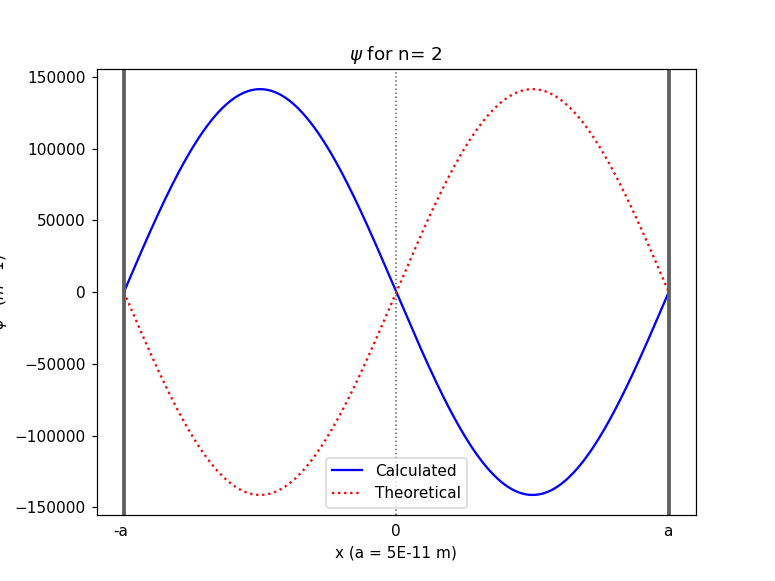

In [11]:
wavefunction_plt(2)

<IPython.core.display.Javascript object>


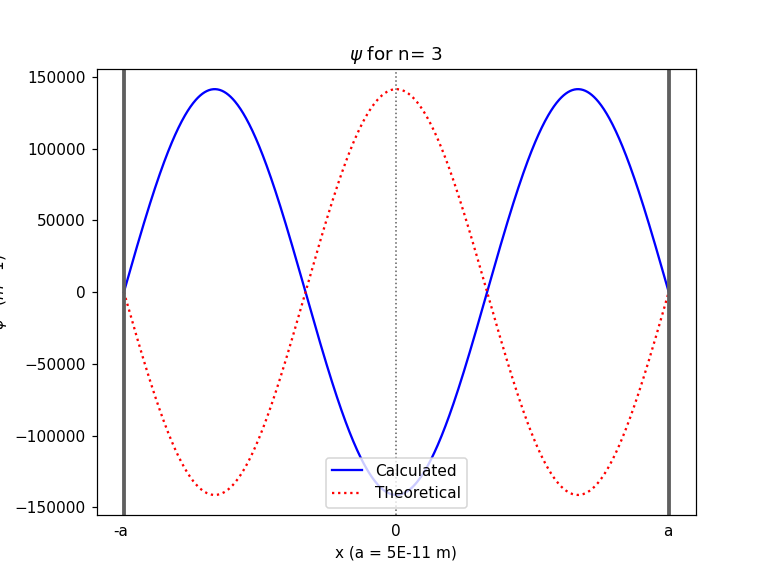

In [12]:
wavefunction_plt(3)

<IPython.core.display.Javascript object>


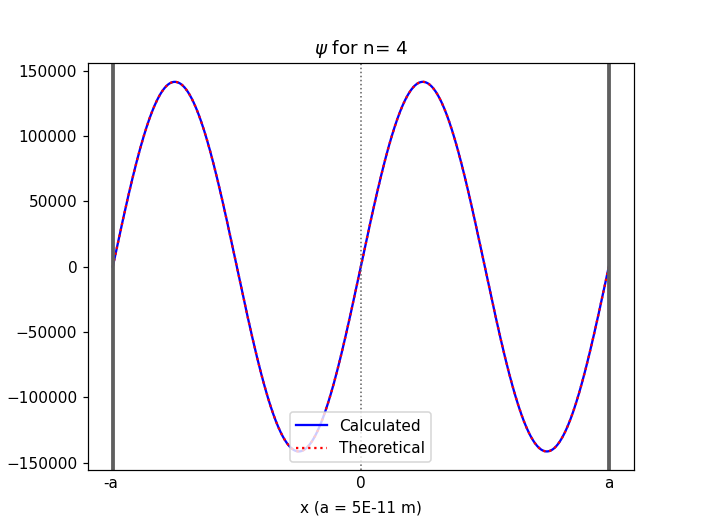

In [13]:
wavefunction_plt(4)

<IPython.core.display.Javascript object>


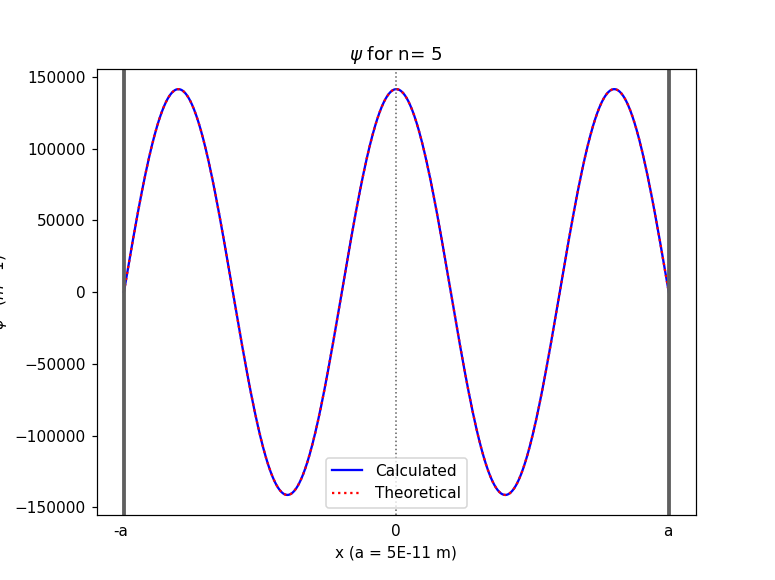

In [14]:
wavefunction_plt(5)

<IPython.core.display.Javascript object>


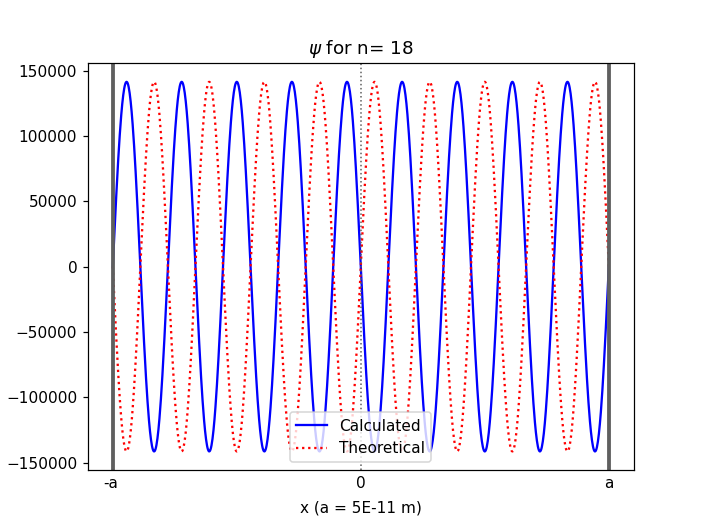

In [15]:
wavefunction_plt(18)

<IPython.core.display.Javascript object>


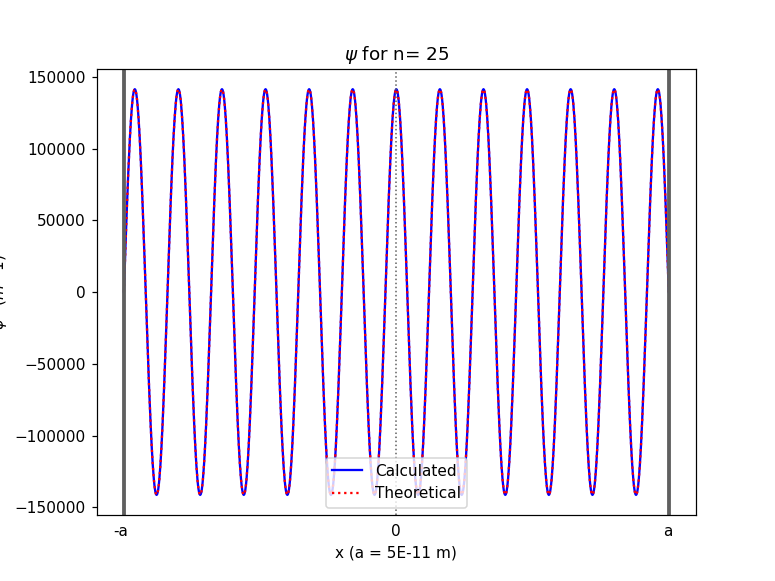

In [16]:
wavefunction_plt(25)

<IPython.core.display.Javascript object>


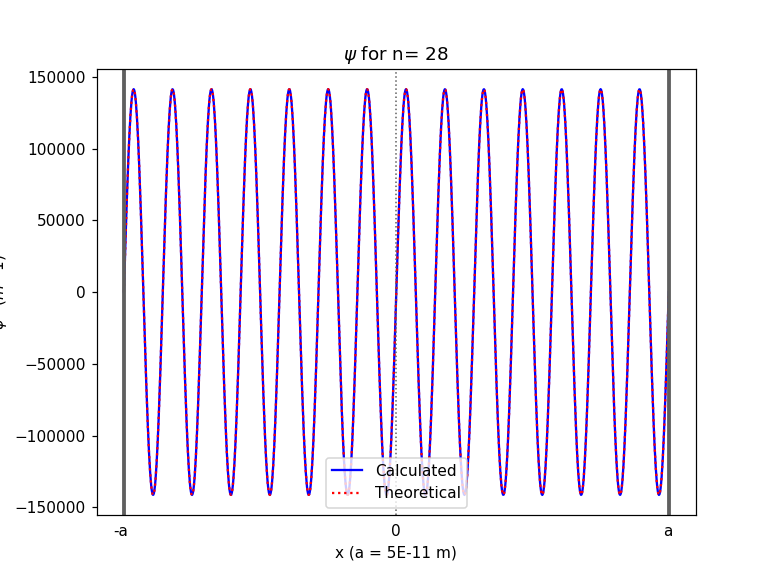

In [17]:
wavefunction_plt(28)

### Discussion ###
With one important exception, the curves match closely for all n checked, even for high values of n, e.g. n=28. At n=25 and n=28, the curves look a little jagged, meaning that N could be increased for a better analytical curve. For some, e.g. n=3,4, the calculated values are the mirror image of the theoretical values, however. They are reflected in x=0 and because of the symmetry of the physical system this should not matter. By observation, it seems that those where the theoretical plot begins with a negative gradient are the ones where this occurs. I think the choice of a positive value for $\phi$ is affecting this. $\phi$ is a scaling factor, rather than an angle as previously thought. In any case, each $\psi$ is normalised later.

Now, other potentials within the infinite well were considered. First a harmonic potential was considered and the first step of this was to develop a new function V(x) using equation (6). Secondly, the formula for Energy levels of a harmonic oscillator (without infinite walls) was used to guess starting values of E1, E2. 

6.[1]
$$
V(x) = V_o \frac {x^2}{a^2} = \frac{1}{2}kx^2
$$

7. [2]
$$
E_v = (v+\frac{1}{2})\hbar\omega
$$   

where $$\omega =(k/m)^\frac{1}{2}
$$

and $$v = 0,1,2...$$

In [18]:
def V(x):
    '''return the potential at position x for harmonic oscillator in infinite well
    Inputs: x - value or array of values
    Outputs: V - value or array of values
    '''
    return V_0 * x**2/a**2

### Discussion ###
According to theory, the wavefunctions for the harmonic potential (unbounded) are:

8.[2]
$$
\psi_v(x) = N_VH_v(y)e^{-y^2/2} 
$$

where

$$
y=(m\omega/\hbar)^{1/2}x
$$

and

$$
N_v = (m\omega/\pi\hbar)^\frac {1}{4} (2^vv!)^\frac {-1}{2}
$$

$$
H_0 = 1
$$

$$
H_1 = 2y
$$

$$
H_2 = 4y^2-2
$$

In [19]:
#copied whole code cell from above.
#have removed existing hash statements just to highlight changes.
tolerance = e/1000
V_0 = 700*e#hinted value from [1]
k = 2*V_0/a**2#variables from above equations
om = (k/m)**0.5


psi_list =[]#empty lists
psi_2_list =[]
E_levels =[]
v_list = list(range(3))# v=0,1,2 - first 3 eigenstates

for v in v_list: #loop through values in v_list
    #new section to calculate theoretical solutions using above equation 8
    N_v = (m*om/(np.pi*h_bar))**0.25* (2**v*np.math.factorial(v))**-0.5#factorial adapted from https://www.kite.com/python/answers/how-to-find-the-factorial-of-an-integer-with-numpy-in-python
    y = (m*om/h_bar)**0.5*x_plot
    if v==0:#different hermite polynomials
        H_v = 1
    elif v==1:
        H_v = 2 * y
    else:
        H_v = 4*y**2 -2
    psi_2 = N_v * H_v * np.exp (- y**2/2)    
    
    #calculate energy levels for harmonic potential (no walls) equation 7
    E = (v+0.5)*h_bar*om#good starting point for guesses E1, E2
    E1 = E *.99
    E2 = E * 1.01
    Calc_E = secant_method(x_arr, E1, E2, N)
    print("v:", v, "\nno wall E:", E/e, "eV", "\twith wall E:", Calc_E/e, "eV\n")
    E_levels.append(Calc_E/ e)#for use in potential, eigenstate plot
    
    psi = RungeKutta2d(np.array([0, np.pi]),x_arr, Calc_E)[0]
    
    I= h * np.sum(psi**2)
    psi = psi / I**0.5

    psi_list.append(psi)
    psi_2_list.append(psi_2)

v: 0 
no wall E: 103.28576819472829 eV 	with wall E: 103.91849486227359 eV

v: 1 
no wall E: 309.8573045841849 eV 	with wall E: 317.008620588667 eV

v: 2 
no wall E: 516.4288409736415 eV 	with wall E: 551.9027806230494 eV



In [20]:
def wavefunction2_plt(v):
    '''Plot wavefunction for harmonic potential within infinite potential well
    Input: v as integer >= 0
    Output: Plot of wavefunction for that v
            both with wall and without'''
    plt.figure()
    plt.plot(x_plot, psi_list[v], "b", label = "with wall")
    plt.plot(x_plot, psi_2_list[v], "r", ls="dotted", label = "no wall")
    plt.axvline(x=-a, c="#5f5f5f", ls="-", lw=2.5)#from hint 5
    plt.axvline(x=a, c="#5f5f5f", ls="-", lw=2.5)
    plt.axvline(x=0, c="#5f5f5f", ls="dotted", lw=1)#show as dotted thinner line as not a boundary
    plt.axhline(y=0, c="#5f5f5f", ls="dotted", lw=1)
    plt.xlabel("x (a = 5E-11 m)")
    plt.ylabel("$\psi$   $(m^-1)$")
    plt.title(f"$\psi$ for v= {v} harmonic potential in infinite well")#use f string to add n number
    plt.legend(loc = "lower right");


<IPython.core.display.Javascript object>


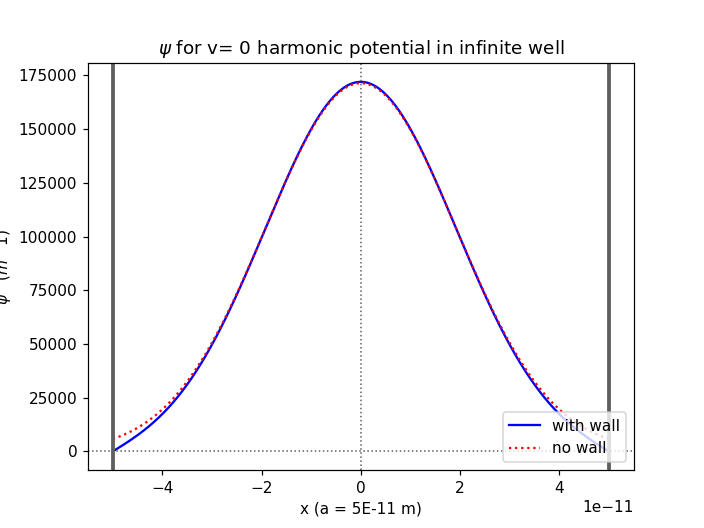

In [21]:
wavefunction2_plt(0)

<IPython.core.display.Javascript object>


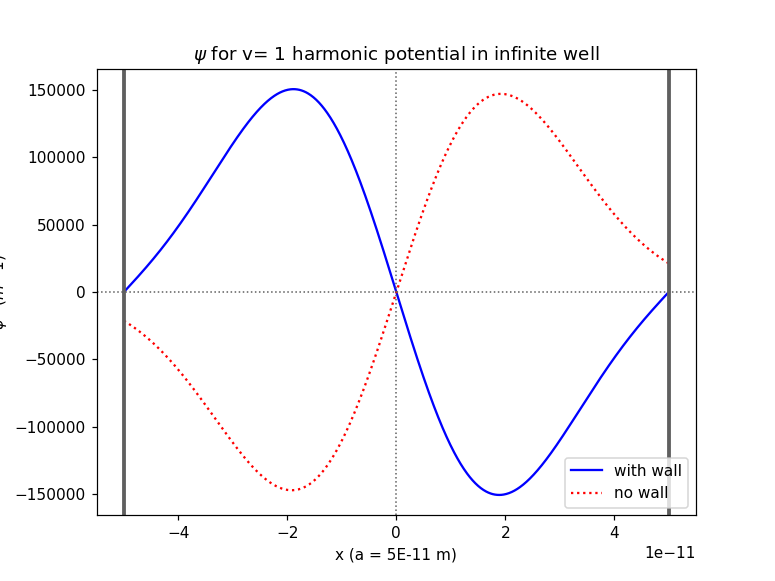

In [22]:
wavefunction2_plt(1)

<IPython.core.display.Javascript object>


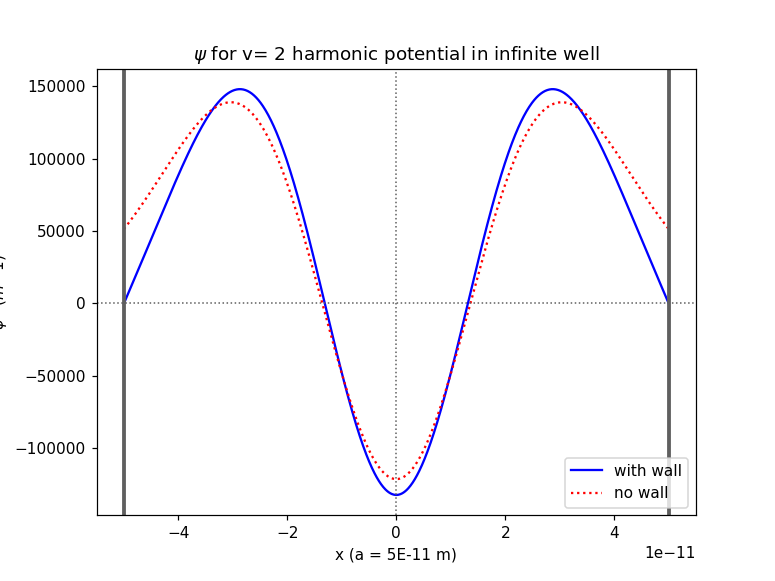

In [23]:
wavefunction2_plt(2)

### Discussion ###
Plots for first three eigenstates came out well. The main conclusion are that the "with wall" solutions follow the shape of the "no wall" solutions closely. They are forced by the boundary consitions to be 0 at a, -a whilst the "no wall" will continue outside this range but tending to zero. The amplitude of the wavefunction is less for the "no wall", because of the area outside -a to a. These features are shown well when v=3, as the higher order wavefunctions for no wall case are more spread out. In the case of v=2, we are seeing reflected solutions, which is not an issue due to the symmetry of the set-up in x=0. 

<IPython.core.display.Javascript object>


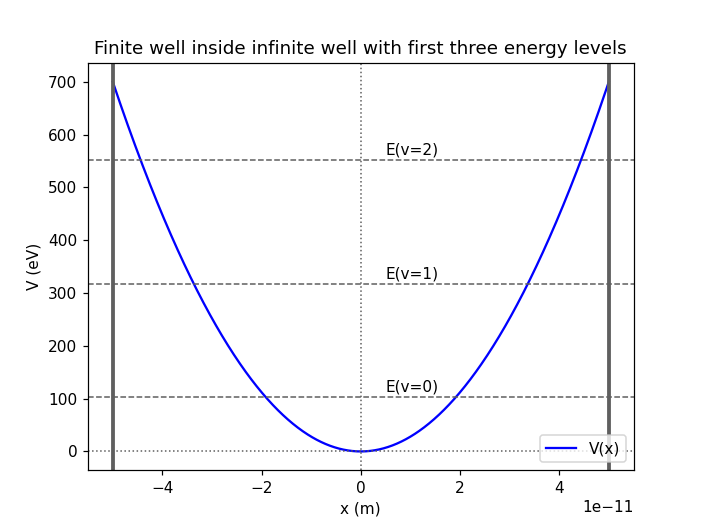

In [24]:
potential = V(x_plot)/e
plt.figure()
plt.plot(x_plot, potential, "b", label = "V(x)")
plt.axvline(x=-a, c="#5f5f5f", ls="-", lw=2.5)#from hint 5
plt.axvline(x=a, c="#5f5f5f", ls="-", lw=2.5)
plt.axvline(x=0, c="#5f5f5f", ls="dotted", lw=1)#show as dotted thinner line as not a boundary
plt.axhline(y=0, c="#5f5f5f", ls="dotted", lw=1)
plt.axhline(y=E_levels[0], c="#5f5f5f", ls="dashed", lw=1)#energy level line
plt.text(0.5e-11, E_levels[0]+10, "E(v=0)")#energy level text
plt.axhline(y=E_levels[1], c="#5f5f5f", ls="dashed", lw=1)
plt.text(0.5e-11, E_levels[1]+10, "E(v=1)")
plt.axhline(y=E_levels[2], c="#5f5f5f", ls="dashed", lw=1)
plt.text(0.5e-11, E_levels[2]+10, "E(v=2)")
plt.xlabel("x (m)")#labelpad shifts down axis label, important as ticks have been removed
plt.ylabel("V (eV)")

plt.title("Finite well inside infinite well with first three energy levels")
plt.legend(loc = "lower right");

### Discussion ###
The three energy levels were just a higher than those for a harmonic potential without wall and the differences increased as v increased. $E_0$ = 103.9 eV vs. 103.3 eV without wall. $E_1$ = 317.0 eV vs. 309.9 eV without wall. $E_2$ = 551.9 eV vs. 516.4 eV without wall. This results from the infinite potential at a, -a. For a harmonic oscillator, the higher order wavefunctions are more spread out and thus the effect of the infinite potential is larger for these.

Now, the potential was set to have the form:

9. [1]
$$
V_x = \begin{cases} 0 & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases} 
$$

In [25]:
def V(x):
    '''return the potential at position x 
    Inputs: x - value or array of values
    Outputs: V - value or array of values
    '''
    V_0 = 1000*e #from hint
    
    return np.where(x**2 > a**2/4, V_0, 0)#adapted from 
    #https://numpy.org/doc/stable/reference/generated/numpy.where.html      

In [26]:
#copied whole code cell from above.
#have removed existing hash statements just to highlight changes.
tolerance = e/1000
V_0 = 1000*e#used higher value than hint 600e as wanted to show a more dramatic effect
psi_list =[]#empty lists
E_levels =[]

v_list = list(range(3))# v=0,1,2 - first 3 eigenstates

for v in v_list: #loop through values in v_list
    
    #secant method
    if v==0: E =100*e
    if v==1: E =400*e#decided by trial and error
    if v==2: E =800*e#decided by trial and error
    E1 = E *.99
    E2 = E * 1.01
    Calc_E = secant_method(x_arr, E1, E2, N)
    print("v:", v, "with wall E:", Calc_E/e, "eV\n")
    E_levels.append(Calc_E/ e)#for use in potential, eigenstate plot
    
    psi = RungeKutta2d(np.array([0, np.pi]),x_arr, Calc_E)[0]
    
    I= h * np.sum(psi**2)
    psi = psi / I**0.5

    psi_list.append(psi)
    #psi_2_list.append(psi_2)


v: 0 with wall E: 96.13643109877405 eV

v: 1 with wall E: 375.8987233418719 eV

v: 2 with wall E: 801.2898899946755 eV



<IPython.core.display.Javascript object>


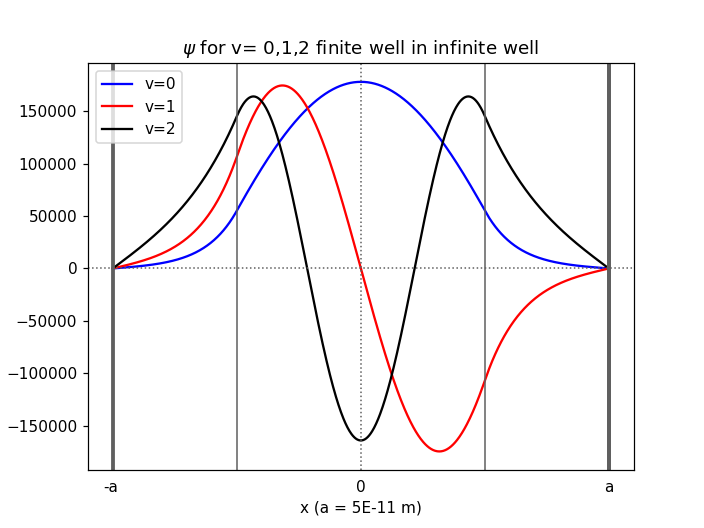

In [27]:
plt.figure()
plt.plot(x_plot, psi_list[0], "b", label = "v=0")
plt.plot(x_plot, psi_list[1], "r", label = "v=1")
plt.plot(x_plot, psi_list[2], "k", label = "v=2")
plt.axvline(x=-a, c="#5f5f5f", ls="-", lw=2.5)#from hint 5
plt.axvline(x=a, c="#5f5f5f", ls="-", lw=2.5)
plt.axvline(x=-a/2, c="#5f5f5f", ls="-", lw=1)#from hint 5
plt.axvline(x=a/2, c="#5f5f5f", ls="-", lw=1)#from hint 5
plt.axvline(x=a, c="#5f5f5f", ls="-", lw=2.5)
plt.axvline(x=0, c="#5f5f5f", ls="dotted", lw=1)#show as dotted thinner line as not a boundary
plt.axhline(y=0, c="#5f5f5f", ls="dotted", lw=1)
plt.text(-0.1e-11, -np.max(psi_list[v]*1.3), "0")#trying to generalise positioning of text from y scale
plt.text(-a-0.2e-11,-np.max(psi_list[v]*1.3),'-a')
plt.text(a-0.1e-11, -np.max(psi_list[v]*1.3), "a")
plt.xticks([])#remove x ticks, adapted from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xlabel("x (a = 5E-11 m)", labelpad = 20)#labelpad shifts down axis label, important as ticks have been removed
plt.ylabel("$\psi$   $(m^-1)$")
plt.legend()

plt.title(f"$\psi$ for v= 0,1,2 finite well in infinite well");#use f string to add n number;


<IPython.core.display.Javascript object>


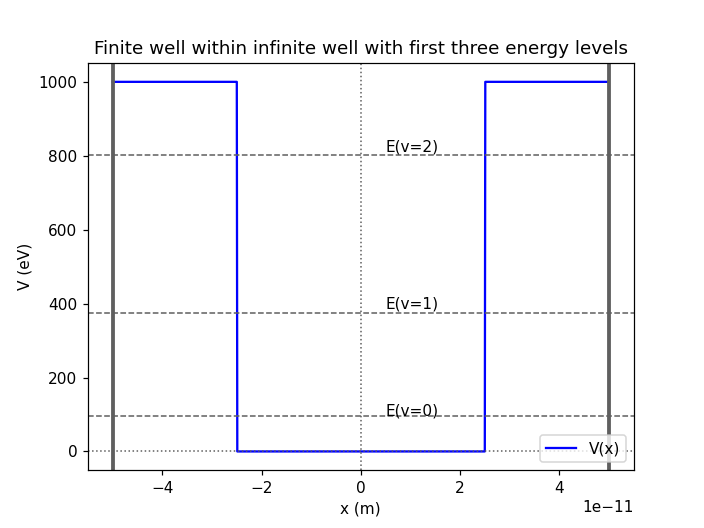

In [28]:
potential = V(x_plot)/e
plt.figure()
plt.plot(x_plot, potential, "b", label = "V(x)")
plt.axvline(x=-a, c="#5f5f5f", ls="-", lw=2.5)#from hint 5
plt.axvline(x=a, c="#5f5f5f", ls="-", lw=2.5)
plt.axvline(x=0, c="#5f5f5f", ls="dotted", lw=1)#show as dotted thinner line as not a boundary
plt.axhline(y=0, c="#5f5f5f", ls="dotted", lw=1)
plt.axhline(y=E_levels[0], c="#5f5f5f", ls="dashed", lw=1)
plt.text(0.5e-11, E_levels[0], "E(v=0)")
plt.axhline(y=E_levels[1], c="#5f5f5f", ls="dashed", lw=1)
plt.text(0.5e-11, E_levels[1]+10, "E(v=1)")
plt.axhline(y=E_levels[2], c="#5f5f5f", ls="dashed", lw=1)
plt.text(0.5e-11, E_levels[2]+10, "E(v=2)")
plt.xlabel("x (m)")#labelpad shifts down axis label, important as ticks have been removed
plt.ylabel("V (eV)")

plt.title("Finite well within infinite well with first three energy levels")#use f string to add n number
plt.legend(loc = "lower right");

### Discussion ###

The first three wave functions ressemble those for a finite well, see right hand side of linked figure below,  except that they must go to zero at the infinite wall at a and -a. In this sense, the wavefunctions for this case and for the harmonic oscillator are affected in the same way: the imposition of the infinite well forces the wavefunctions to go to zero at a and -a.

http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/imgqua/pfbx1.gif
[3]

As the third scenario, it was decided to have a function of $V_0$ that was not symmetrical by reflection in x=0. A straight line potential, starting at 0 and x=-a and rising to V_0 at x=a, was used. This was deemed interesting as results could be compared to those from the bead experiment in Session 9.

10.
$$
V_x = V_0(x + a) / 2a
$$



In [29]:
def V(x):
    '''return the potential at position x 
    Inputs: x - value or array of values
    Outputs: V - value or array of values
    '''
    V_0 = 1000*e #this value worked well
    
    return V_0 * (x + a)/ (2*a)#from equation 10.

In [30]:
#copied whole code cell from above.
#have removed existing hash statements just to highlight changes.
tolerance = e/1000
V_0 = 1000*e
psi_list =[]
E_levels =[]
v_list = list(range(3))
for v in v_list:    
    if v==0: E =100*e#set by trial and error
    if v==1: E =700*e
    if v==2: E =800*e
    E1 = E *.99
    E2 = E * 1.01
    Calc_E = secant_method(x_arr, E1, E2, N)  
    E_levels.append(Calc_E/ e)   
    psi = RungeKutta2d(np.array([0, np.pi]),x_arr, Calc_E)[0]    
    I= h * np.sum(psi**2)
    psi = psi / I**0.5
    psi_list.append(psi)

In [31]:
print(E_levels)

[365.17958394655756, 638.8105587136994, 872.6374306456114]


<IPython.core.display.Javascript object>


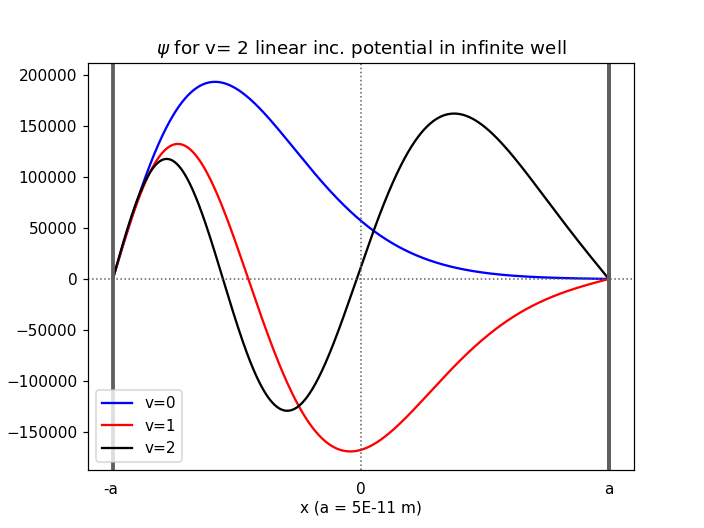

In [32]:
plt.figure()
plt.plot(x_plot, psi_list[0], "b", label = "v=0")
plt.plot(x_plot, psi_list[1], "r", label = "v=1")
plt.plot(x_plot, psi_list[2], "k", label = "v=2")
plt.axvline(x=-a, c="#5f5f5f", ls="-", lw=2.5)#from hint 5
plt.axvline(x=a, c="#5f5f5f", ls="-", lw=2.5)
plt.axvline(x=a, c="#5f5f5f", ls="-", lw=2.5)
plt.axvline(x=0, c="#5f5f5f", ls="dotted", lw=1)#show as dotted thinner line as not a boundary
plt.axhline(y=0, c="#5f5f5f", ls="dotted", lw=1)
plt.text(-0.1e-11, -np.max(psi_list[v]*1.3), "0")#trying to generalise positioning of text from y scale
plt.text(-a-0.2e-11,-np.max(psi_list[v]*1.3),'-a')
plt.text(a-0.1e-11, -np.max(psi_list[v]*1.3), "a")
plt.xticks([])#remove x ticks, adapted from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
plt.xlabel("x (a = 5E-11 m)", labelpad = 20)#labelpad shifts down axis label, important as ticks have been removed
plt.ylabel("$\psi$   $(m^-1)$")
plt.legend()
plt.title(f"$\psi$ for v= {v} linear inc. potential in infinite well");#use f string to add n number;

<IPython.core.display.Javascript object>


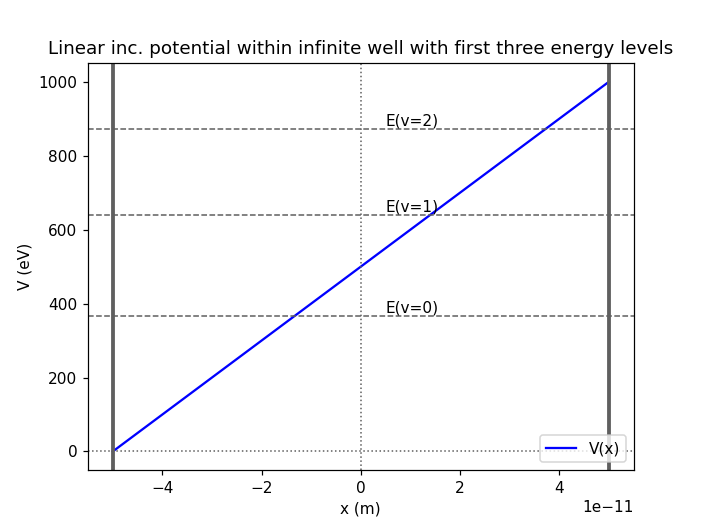

In [33]:
potential = V(x_plot)/e
plt.figure()
plt.plot(x_plot, potential, "b", label = "V(x)")
plt.axvline(x=-a, c="#5f5f5f", ls="-", lw=2.5)#from hint 5
plt.axvline(x=a, c="#5f5f5f", ls="-", lw=2.5)
plt.axvline(x=0, c="#5f5f5f", ls="dotted", lw=1)#show as dotted thinner line as not a boundary
plt.axhline(y=0, c="#5f5f5f", ls="dotted", lw=1)
plt.axhline(y=E_levels[0], c="#5f5f5f", ls="dashed", lw=1)
plt.text(0.5e-11, E_levels[0]+10, "E(v=0)")
plt.axhline(y=E_levels[1], c="#5f5f5f", ls="dashed", lw=1)
plt.text(0.5e-11, E_levels[1]+10, "E(v=1)")
plt.axhline(y=E_levels[2], c="#5f5f5f", ls="dashed", lw=1)
plt.text(0.5e-11, E_levels[2]+10, "E(v=2)")
plt.xlabel("x (m)")#labelpad shifts down axis label, important as ticks have been removed
plt.ylabel("V (eV)")

plt.title("Linear inc. potential within infinite well with first three energy levels")#use f string to add n number
plt.legend(loc = "lower right");

### Discussion ###

It would be expected that the wavefunctions would be more concentrated in areas (i.e. large amplitude) where the potential was lower, i.e. the left hand side of each chart. This is certainly true for v=0, and v=1, but it does not look like it is the case for v=2. This is a surprising result.

In addition, the shapes of the graphs do not accord with those of the first modes of vibration of a series of springs with linearly increasing spring constants (from Session 9), see images below.

However, as with the other examples, the imposition of the infinte wells, forces all wavefunction to equal zero at -a and +a

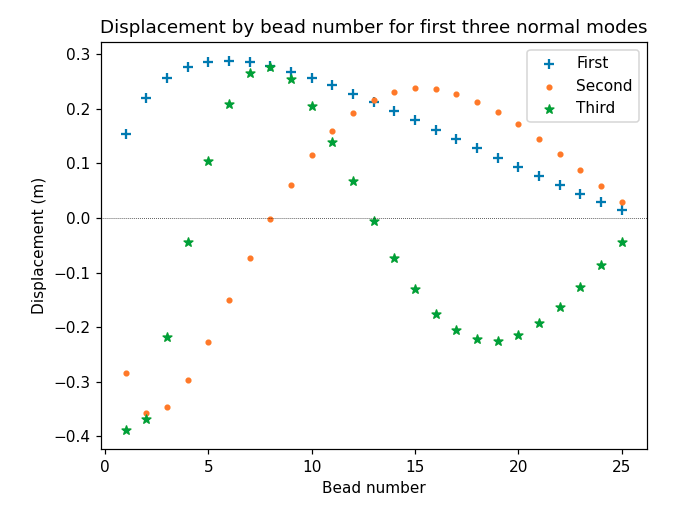

In [33]:
#from IPython.display import Image #adapted from Session 9
#Image(filename='beads.png', embed=True)

### Overall Conclusions ###

The assignment was completed, but there were several areas for improvement. It was handy to put the plots into functions, but more work was needed to be done on the labelling of a, -a on the charts. In the first set of charts (for the infinite well with $V_0 = 0$ inside), 28 wavefunctions were generated each with 1001 points!

The last scenario, gave some unexpected results which would require some more investigation

## Bibliography

* Dash, L. 2020. _" PHAS0029 Final Assignment 2020"_. \[Online\] UCL Moodle resource. Available from   https://moodle.ucl.ac.uk/course/view.php?id=6766&section=14 \[accessed 6th February 2020\]

* D.Hanson, E.Harvey et al. "5.4: The Harmonic Oscillator Energy Levels. chem.libretexts.org. "https://chem.libretexts.org/Courses/Pacific_Union_College/Quantum_Chemistry/05%3A_The_Harmonic_Oscillator_and_the_Rigid_Rotor/5.04%3A_The_Harmonic_Oscillator_Energy_Levels (accessed Aug, 28, 2021)

* R Nave. "Particle in Finite-Walled Box". hyperphysics.phy-astr.gsu.edu http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/pbox.html (accessed Aug, 28, 2021)